In [1]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import sys
import joblib
from scipy.special import softmax
import sasc.config
import numpy as np
from collections import defaultdict
from copy import deepcopy
import pandas as pd
import sasc.viz
from sasc.config import FMRI_DIR, RESULTS_DIR
import dvu
import sasc.viz
dvu.set_style()

### Barplots

mean 0.19103979716530367
mean single 0.17854914462713095
mean inter 0.24499967087406552
median 0.29796848888114497
offset 0 16
offset 16 16
mean 0.09363116023816781


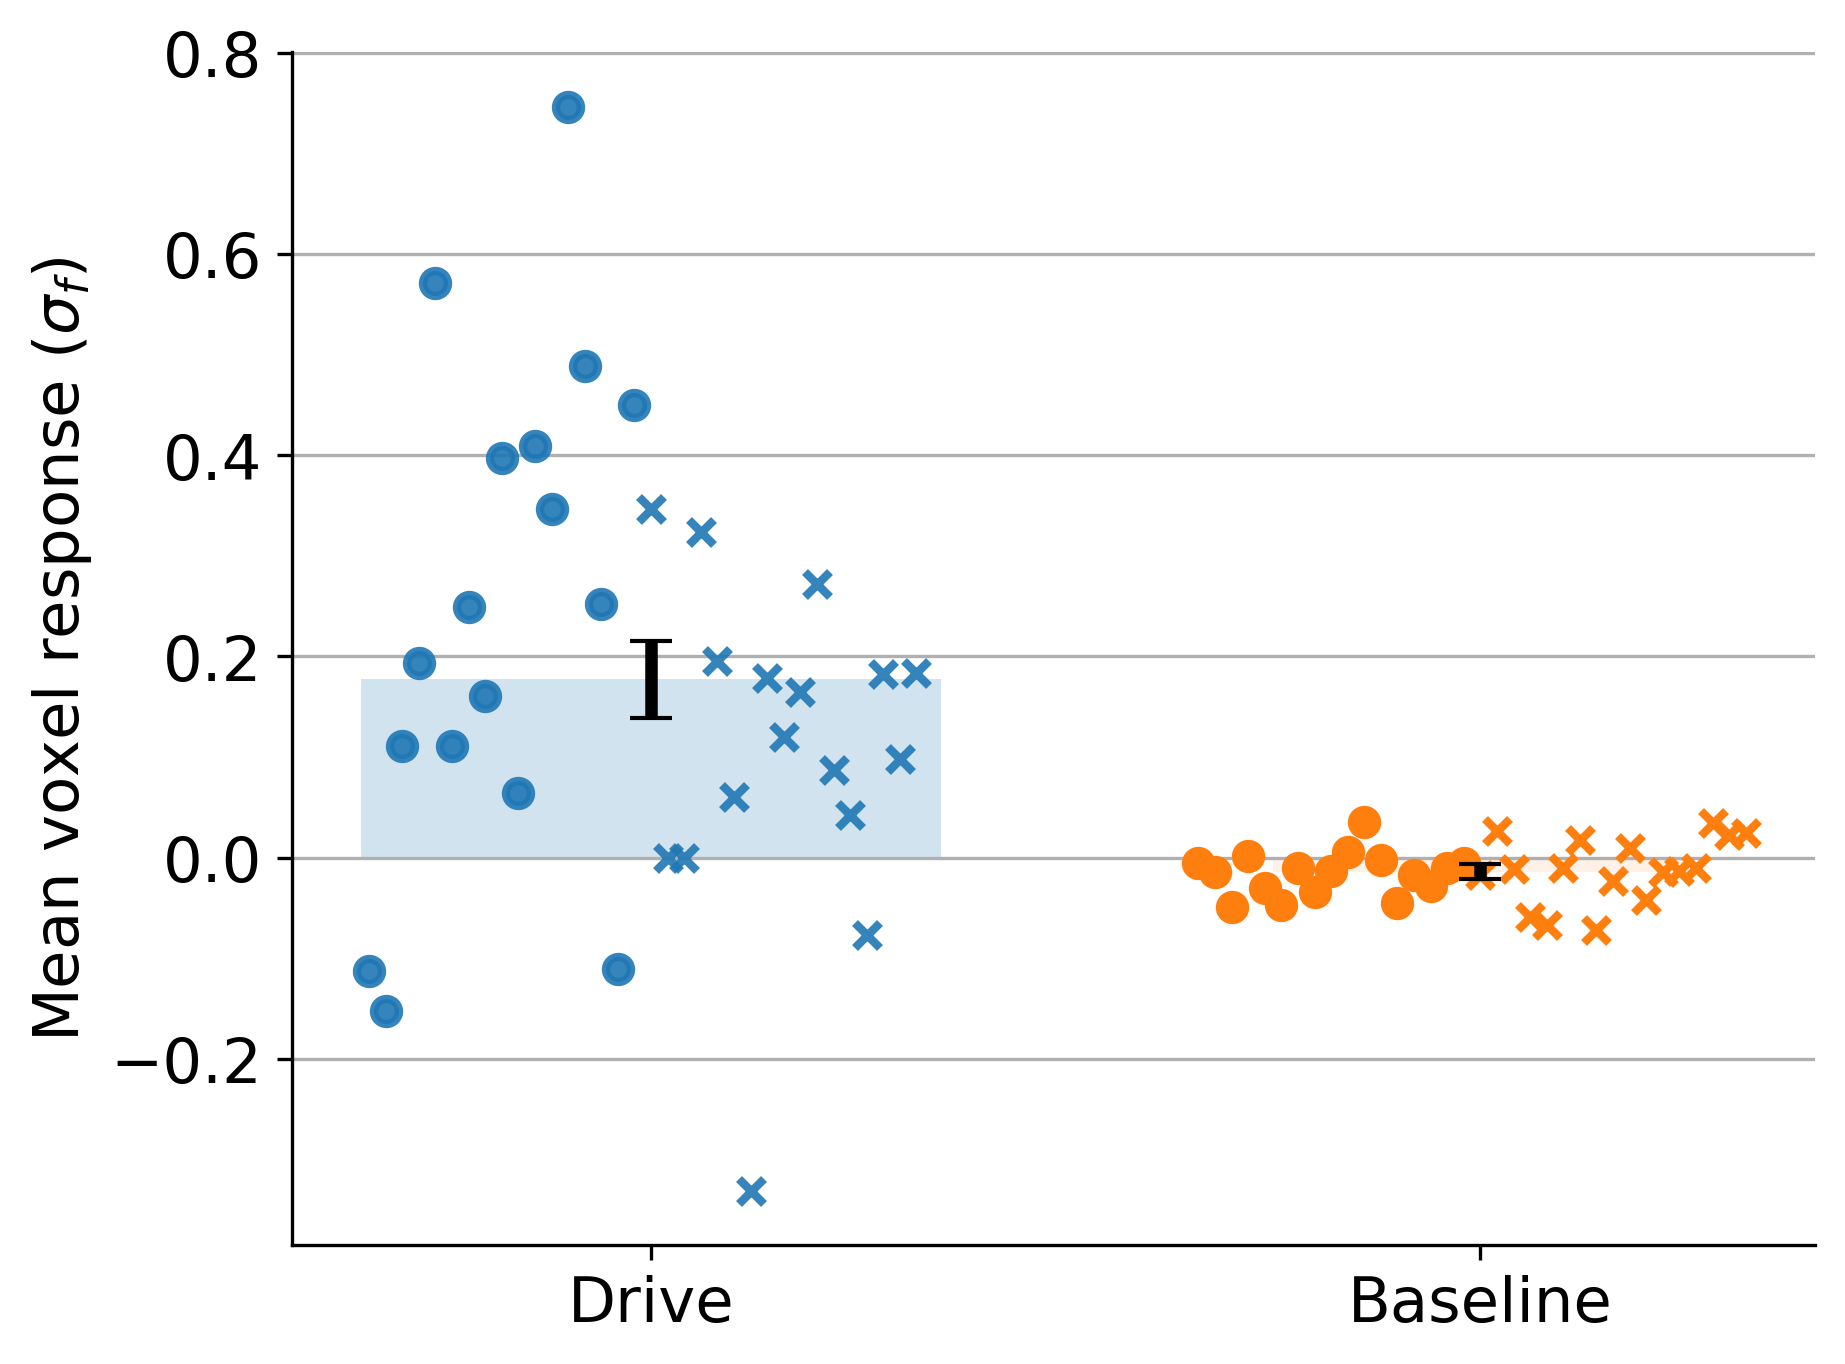

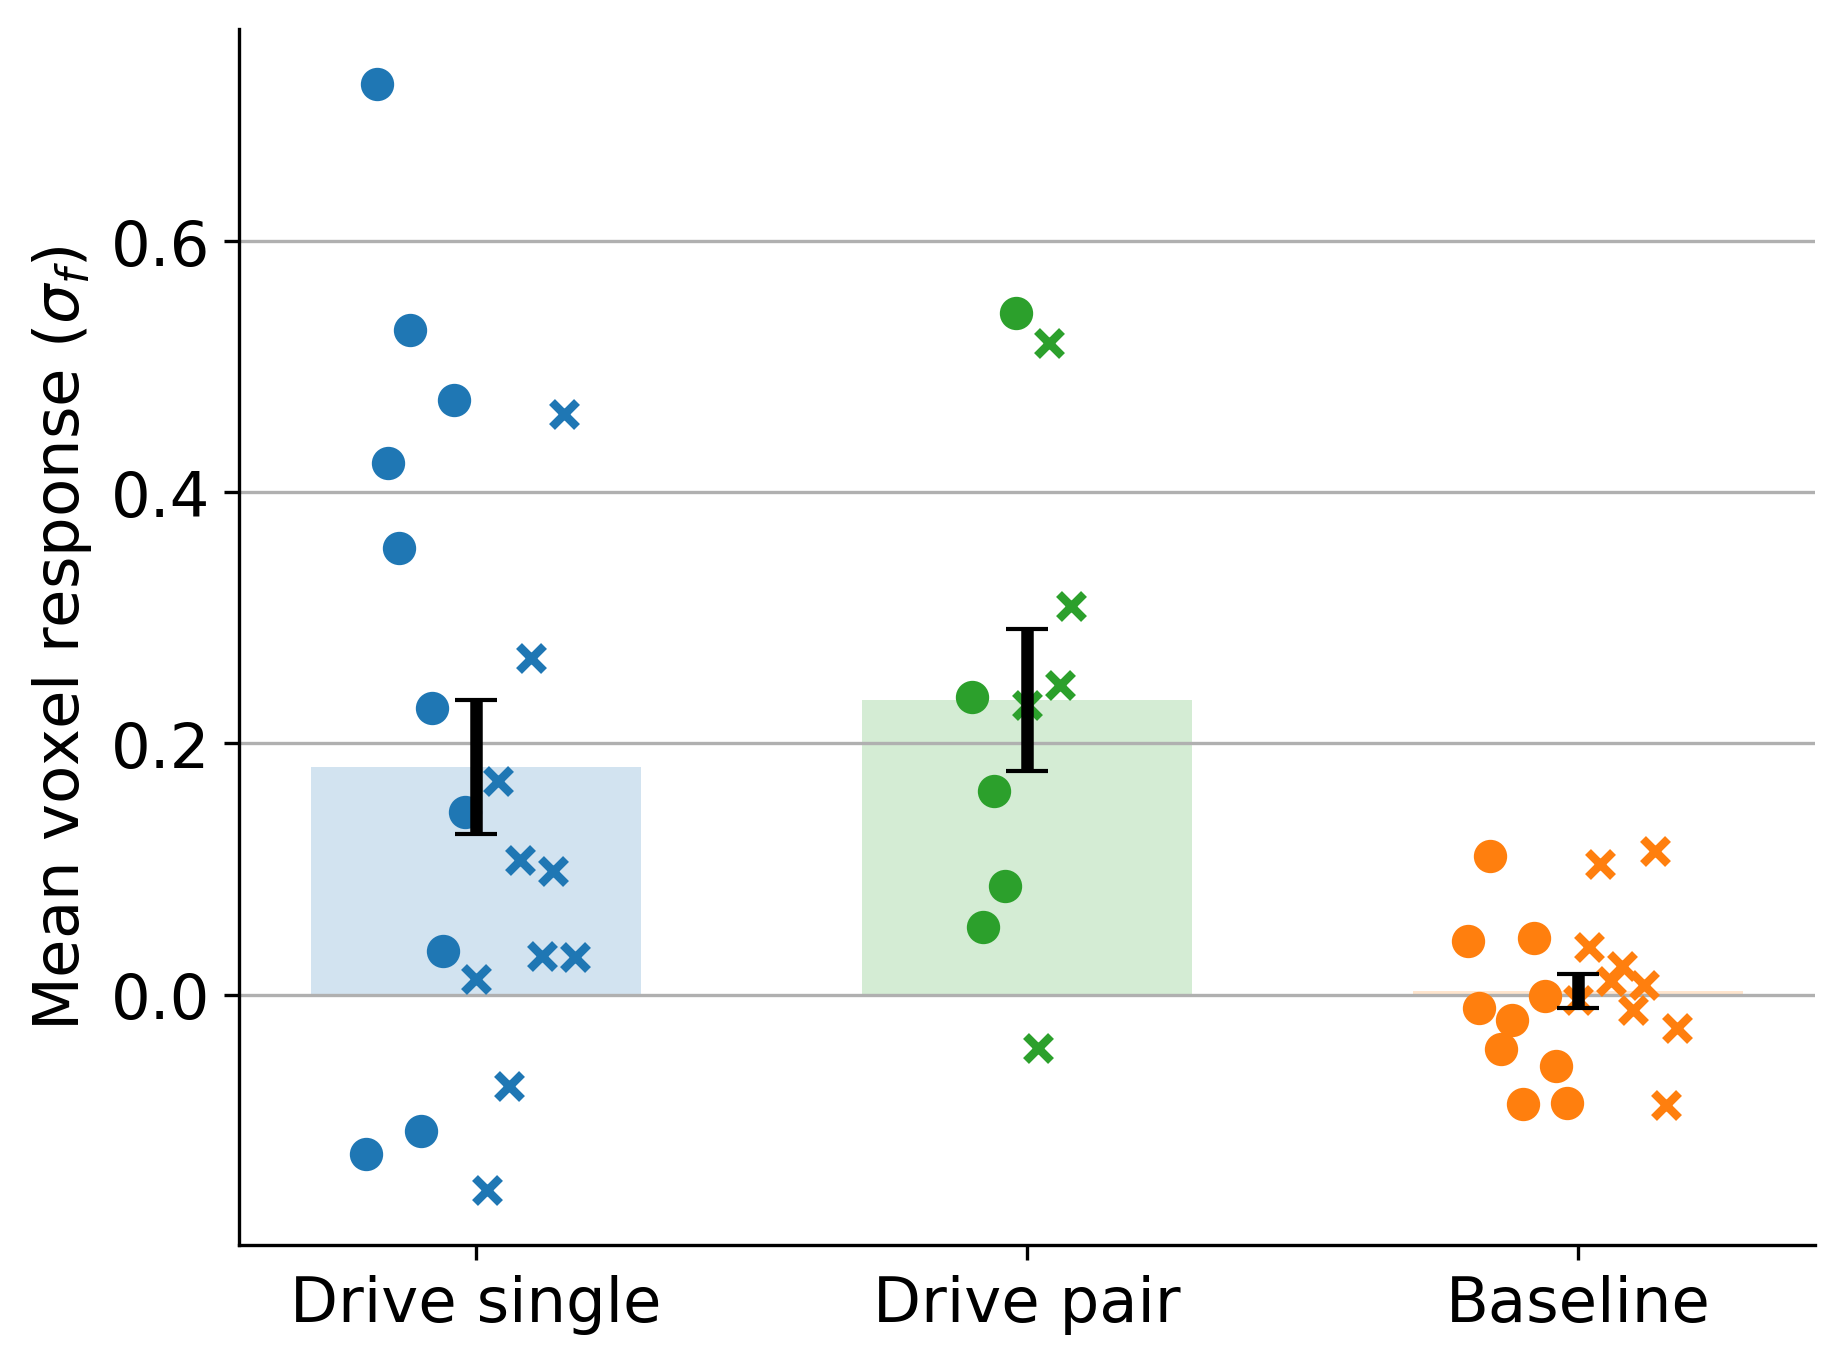

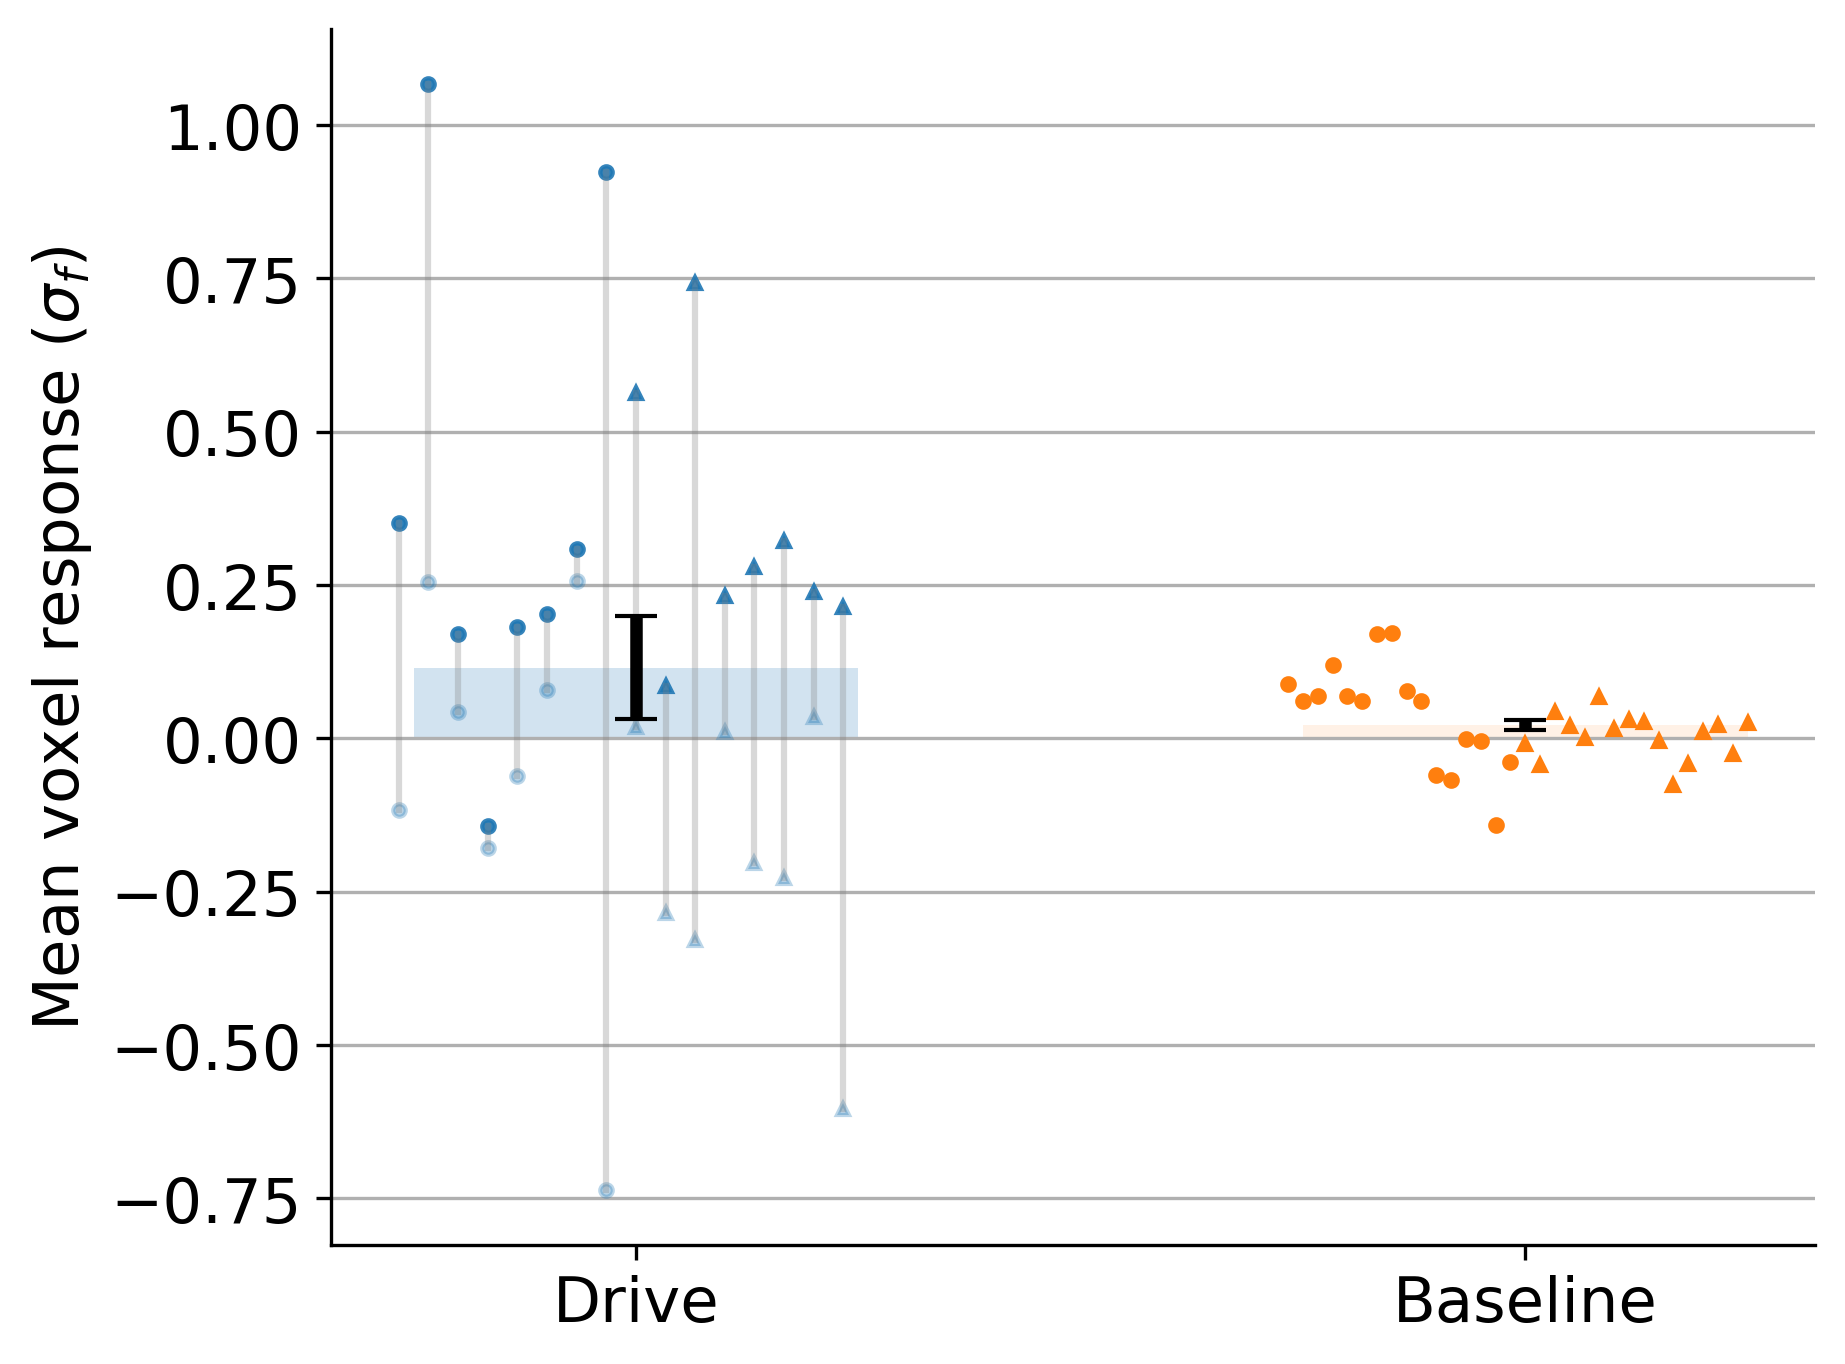

In [29]:
# default
uts02 = joblib.load(join(RESULTS_DIR, 'processed', 'pilot_default_means.pkl'))
uts03 = joblib.load(join(RESULTS_DIR, 'processed', 'pilot3_default_means.pkl'))
sasc.viz.barplot_default([uts02['diag_means'], uts03['diag_means']],
                         [uts02['off_diag_means'], uts03['off_diag_means']],
                         pilot_name='full_', expls=[], annot_points=False)

# interactions
uts02 = joblib.load(join(RESULTS_DIR, 'processed',
                    'pilot2_interactions_means.pkl'))
uts03 = joblib.load(join(RESULTS_DIR, 'processed',
                    'pilot3_interactions_means.pkl'))
sasc.viz.barplot_interaction([uts02['diag_means'], uts03['diag_means']],
                             [uts02['off_diag_means'], uts03['off_diag_means']],
                             [uts02['diag_means_interaction'],
                              uts03['diag_means_interaction']],
                             [uts02['off_diag_means_interaction'],
                              uts03['off_diag_means_interaction']],
                             pilot_name='full_')

# polysemantic
uts02 = joblib.load(join(RESULTS_DIR, 'processed', 'pilot2_poly_means.pkl'))
uts03 = joblib.load(join(RESULTS_DIR, 'processed', 'pilot3_poly_means.pkl'))
sasc.viz.barplot_polysemantic([uts02['diag_means'], uts03['diag_means']],
                              [uts02['off_diag_means'], uts03['off_diag_means']],
                              pilot_name='full_', expls=[], annot_points=False)

### Stability scores

[ 0.13570394  0.09134055 -0.00361446  0.16915396  0.30029146  0.22086469
  0.18411047  0.0136344   0.1632041   0.0370703   0.31092223  0.11057752
  0.28302966  0.06722047  0.23354239  0.19080461  0.18761371] 0.32092223026696776
[0.29689039 0.26372229 0.19999237 0.24791477 0.25027913 0.25294156
 0.27754668 0.27852662 0.27748936 0.30080242 0.32131122 0.30093107
 0.24596359 0.25819512 0.36743863 0.24301459 0.29956432] 0.3774386315215994


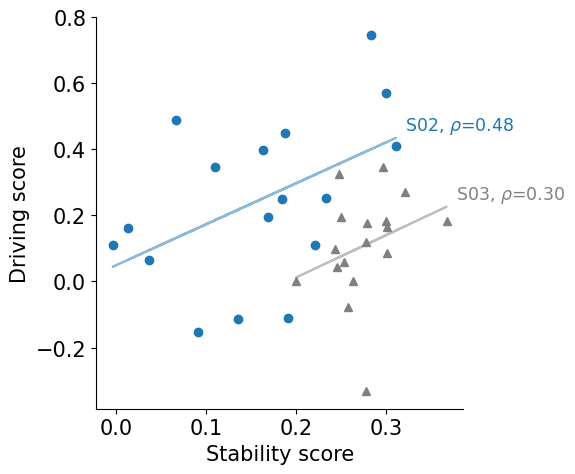

In [24]:
voxel_scores1 = joblib.load(
    join(RESULTS_DIR, 'processed', 'pilot_default_voxel_scores.pkl'))
voxel_scores2 = joblib.load(
    join(RESULTS_DIR, 'processed', 'pilot3_default_voxel_scores.pkl'))


def plot_line_with_corr(voxel_scores, i=0, cs=['C0', 'gray'], markers=['o', '^']):
    x = voxel_scores["stability_score"].values
    y = voxel_scores["driving_score"].values
    plt.plot(x, y, markers[i], color=cs[i], )

    # plot line of best fit
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b, color=cs[i], alpha=0.5)

    # add annotation
    subjs = ['S02', 'S03']
    corr = np.corrcoef(x, y)[0, 1]
    xend = max(x) + 0.01
    yend = m * xend + b + 0.01
    plt.text(
        xend,
        yend,
        f"{subjs[i]}, $\\rho$={corr:.2f}",
        color=cs[i],
        fontsize='small'
    )

    plt.ylabel("Driving score")
    plt.xlabel("Stability score")


plt.figure(figsize=(6, 5))
plot_line_with_corr(voxel_scores1, i=0)
plot_line_with_corr(voxel_scores2, i=1)


plt.savefig(join(RESULTS_DIR, 'figs/misc',
            'full_stability_score.pdf'), bbox_inches='tight')
plt.show()

### Example curve with predictions

corr 0.48211266326365826


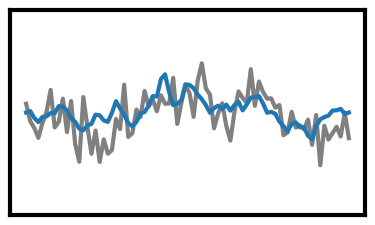

In [3]:
pred, actual = joblib.load(join(sasc.config.RESULTS_DIR,
                                'processed', 'vox23367_pred_actual.jbl'))

plt.figure(figsize=(4, 2.5))
plt.plot(actual[:80], '-', color='gray', lw=3)
plt.plot(pred[:80], '-', color='C0', lw=3)
# plt.axhline(0, color='gray', linestyle='--', lw=3)
# plt.axhline(np.mean(resps_rep_means[5]), color='#08b47c', linestyle='--', lw=3)
plt.ylim(-2, 2)
plt.xticks([])
plt.yticks([])

print('corr', np.corrcoef(pred, actual)[0, 1])
# turn on all splines
for spine in plt.gca().spines.values():
    spine.set_visible(True)

    # make spline thick
    spine.set_linewidth(3)
plt.savefig(join(sasc.config.RESULTS_DIR, 'figs',
            'misc', 'food_prep_pred_resp.pdf'), bbox_inches='tight')

### Create dummy legend

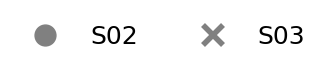

In [25]:
# create a dummy legend with a gray circle and triangle
# to represent the two subjects
plt.figure(figsize=(3, 1))
plt.plot([], [], 'o', color='gray', label='S02', markersize=15)
plt.plot([], [], 'x', color='gray', label='S03',
         markersize=15, markeredgewidth=4)
plt.legend(loc='center', ncol=2, frameon=False, fontsize='large')
plt.axis('off')
plt.savefig(join(RESULTS_DIR, 'figs/misc',
            'full_stability_score_legend.pdf'), bbox_inches='tight')

### Story scores

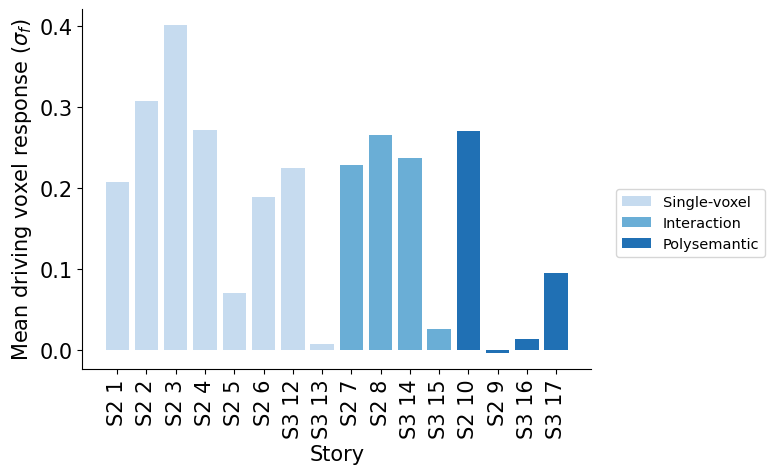

In [14]:
default02 = joblib.load(
    join(RESULTS_DIR, 'processed', 'pilot_default_story_scores.pkl'))
default03 = joblib.load(
    join(RESULTS_DIR, 'processed', 'pilot3_default_story_scores.pkl'))
interactions02 = joblib.load(
    join(RESULTS_DIR, 'processed', 'pilot2_interactions_story_scores.pkl'))
interactions03 = joblib.load(
    join(RESULTS_DIR, 'processed', 'pilot3_interactions_story_scores.pkl'))
polysemantic02 = joblib.load(
    join(RESULTS_DIR, 'processed', 'pilot2_poly_story_scores.pkl'))
polysemantic03 = joblib.load(
    join(RESULTS_DIR, 'processed', 'pilot3_poly_story_scores.pkl'))


dfs = [default02, default03, interactions02,
       interactions03, polysemantic02, polysemantic03]
subj = ['S2', 'S3', 'S2', 'S3', 'S2', 'S3']
setting = ['Single-voxel', 'Single-voxel', 'Interaction', 'Interaction',
           'Polysemantic', 'Polysemantic']
df_big = []
for df in dfs:
    # make barplot comparing driving and baseline
    d = df.melt(id_vars='story', value_vars=[
        'driving', 'baseline'], var_name='condition', value_name='mean')
    d['subj'] = subj.pop(0)
    d['setting'] = setting.pop(0)
    d['story'] = d.apply(lambda x: x['subj'] + ' ' + x['story'], axis=1)
    df_big.append(deepcopy(d))

df_big = pd.concat(df_big)
df_big['story'] = df_big['story'].str.replace('GenStory', '')
df_big = df_big[df_big['condition'] == 'driving']


# set xticklabels rotated
plt.figure(figsize=(8, 5))
# plt.grid()

# shade bars by subj
offset = 0
xticklabels = []
for i, setting in enumerate(df_big['setting'].unique()):
    d = df_big[df_big['setting'] == setting]
    d = d.sort_values('story')
    plt.bar(np.arange(len(d)) + offset, d['mean'], label=setting,
            color=sns.color_palette("Blues", 3)[i])
    xticklabels += d['story'].tolist()
    offset += len(d)

# move legend to right
plt.legend(bbox_to_anchor=(1.05, 0.5), loc=2,
           borderaxespad=0., fontsize='x-small')

plt.xticks(rotation=90, va='top', labels=xticklabels,
           ticks=np.arange(len(xticklabels)))
plt.xlabel('Story')


plt.ylabel('Mean driving voxel response ($\sigma_f$)')
plt.savefig(join(RESULTS_DIR, 'figs/main', 'full_story_breakdown.pdf'))

plt.show()